In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

nc_df = pd.read_csv("Resources/NC-Accidents.csv")
nc_df.head()

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,512402,A-512403,MapQuest,241.0,3,2019-03-03 18:18:55,2019-03-03 18:48:19,35.241394,-80.850349,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
1,513350,A-513351,MapQuest,201.0,3,2019-03-04 04:50:16,2019-03-04 05:19:52,35.673294,-80.856918,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
2,513351,A-513352,MapQuest,201.0,2,2019-03-04 05:12:57,2019-03-04 05:42:43,35.080902,-80.850151,NaN,...,False,False,False,False,True,False,Night,Night,Night,Night
3,513352,A-513353,MapQuest,201.0,2,2019-03-04 05:37:25,2019-03-04 06:07:10,35.202320,-80.832909,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
4,513353,A-513354,MapQuest,201.0,2,2019-03-04 06:31:12,2019-03-04 07:01:00,35.252460,-80.643356,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day


In [3]:
nc_df = nc_df.drop(columns={"TMC","Timezone","Wind_Speed(mph)",
                    "Wind_Direction","End_Lat","End_Lng","Number",
                   "State","Country","Zipcode","Airport_Code","Wind_Chill(F)",
                   "Precipitation(in)"})

In [4]:
nc_df = nc_df.dropna()

In [5]:
nc_df.count()

Unnamed: 0               107616
ID                       107616
Source                   107616
Severity                 107616
Start_Time               107616
End_Time                 107616
Start_Lat                107616
Start_Lng                107616
Distance(mi)             107616
Description              107616
Street                   107616
Side                     107616
City                     107616
County                   107616
Weather_Timestamp        107616
Temperature(F)           107616
Humidity(%)              107616
Pressure(in)             107616
Visibility(mi)           107616
Weather_Condition        107616
Amenity                  107616
Bump                     107616
Crossing                 107616
Give_Way                 107616
Junction                 107616
No_Exit                  107616
Railway                  107616
Roundabout               107616
Station                  107616
Stop                     107616
Traffic_Calming          107616
Traffic_

In [6]:
bool_col=[col for col in nc_df.columns if nc_df[col].dtype ==np.dtype('bool')]
traffic_object_df= nc_df[bool_col]
traffic_objects=traffic_object_df.sum(axis=0)
traffic_objects

Amenity             1607
Bump                  14
Crossing            9421
Give_Way             411
Junction            4656
No_Exit              201
Railway             1473
Roundabout             5
Station              619
Stop                 777
Traffic_Calming       23
Traffic_Signal     28178
Turning_Loop           0
dtype: int64

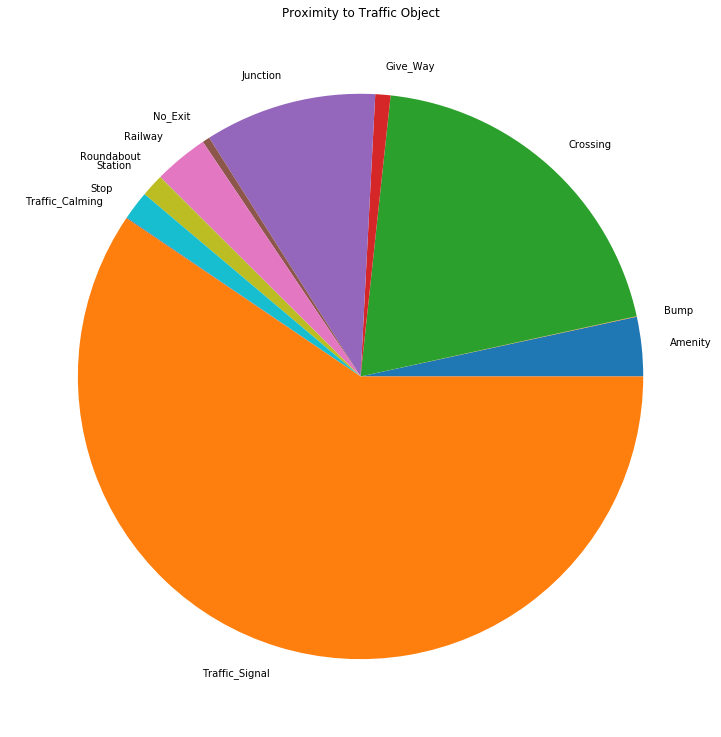

In [7]:
traffic_objects.plot.pie(figsize=(13,13))
plt.ylabel('')
plt.title('Proximity to Traffic Object')

plt.savefig('Traffic_Pie.png')

In [8]:
weather_condition=nc_df['Weather_Condition'].value_counts()
weather_condition

Mostly Cloudy                   24201
Clear                           22886
Overcast                        17580
Partly Cloudy                   16613
Scattered Clouds                13723
Light Rain                       6728
Rain                             1602
Light Drizzle                     902
Fog                               589
Heavy Rain                        523
Light Snow                        361
Thunderstorm                      342
Patches of Fog                    266
Light Thunderstorms and Rain      265
Drizzle                           212
Haze                              173
Heavy Thunderstorms and Rain      137
Snow                              116
Thunderstorms and Rain            116
Mist                               65
Smoke                              64
Light Ice Pellets                  46
Light Freezing Rain                36
Heavy Snow                         25
Heavy Drizzle                      14
Ice Pellets                        10
Shallow Fog 

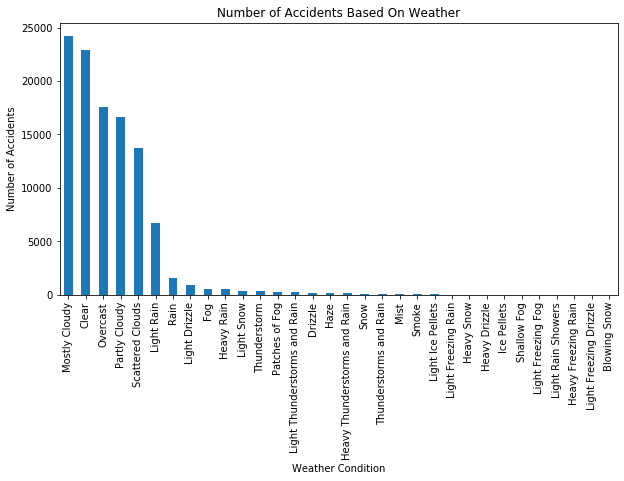

In [22]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

accident_chart=weather_condition.plot(kind='bar')
accident_chart.set_xlabel("Weather Condition")
accident_chart.set_ylabel("Number of Accidents")
plt.title("Number of Accidents Based On Weather")
plt.savefig('Traffic_Bar.png')

plt.show()